# **Import Data**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv('Case Study Chapter 3 Topic 3_ Dataset Kebotakan (Not Clean).csv')
df.head()

,umur,jenis_kelamin,pekerjaan,provinsi,gaji,is_menikah,is_keturunan,berat,tinggi,sampo,is_merokok,pendidikan,stress,botak_prob
0,27.0,Perempuan,PNS,Bengkulu,7.957453e+06,1.0,0.0,54.315053,170.428542,Pantone,1.0,S1,5.0,0.605974
1,53.0,Perempuan,PNS,Bandung,7.633003e+06,1.0,0.0,72.873404,165.530097,Pantone,0.0,S1,7.0,0.532860
2,37.0,Perempuan,Pegawai swasta,Bandung,6.637625e+06,1.0,0.0,46.321533,154.599388,Moonsilk,0.0,S1,4.0,0.418442
3,36.0,Perempuan,Pengangguran,Palu,3.624871e+06,1.0,0.0,51.539781,167.340481,Deadbuoy,1.0,SD,9.0,0.804050
4,38.0,Laki-laki,Freelance,Palangkaraya,6.031808e+06,1.0,0.0,60.726909,165.514773,Merpati,1.0,S2,1.0,0.368371


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7917 entries, 0 to 7916
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   umur           7832 non-null   float64
 1   jenis_kelamin  7840 non-null   object 
 2   pekerjaan      7760 non-null   object 
 3   provinsi       7831 non-null   object 
 4   gaji           7843 non-null   float64
 5   is_menikah     7845 non-null   float64
 6   is_keturunan   7828 non-null   float64
 7   berat          7861 non-null   float64
 8   tinggi         7843 non-null   float64
 9   sampo          7858 non-null   object 
 10  is_merokok     7847 non-null   float64
 11  pendidikan     7847 non-null   object 
 12  stress         7853 non-null   float64
 13  botak_prob     7838 non-null   float64
dtypes: float64(9), object(5)
memory usage: 866.0+ KB


In [ ]:
# Melihat statistik Deskriptif
df.describe()

,umur,gaji,is_menikah,is_keturunan,berat,tinggi,is_merokok,stress,botak_prob
count,7832.000000,7.843000e+03,7845.000000,7828.000000,7861.000000,7843.000000,7847.000000,7853.000000,7838.000000
mean,39.492722,8.853770e+06,0.979095,0.204650,55.957306,167.252704,0.497133,5.456259,0.573851
std,9.882786,4.499844e+06,0.143076,0.403471,9.594065,10.933646,0.500024,2.860623,0.173386
min,2.000000,1.500000e+06,0.000000,0.000000,40.000000,125.491784,0.000000,1.000000,0.064633
25%,33.000000,5.735468e+06,1.000000,0.000000,49.312715,159.758874,0.000000,3.000000,0.452360
50%,39.000000,7.850662e+06,1.000000,0.000000,53.839669,167.155287,0.000000,5.000000,0.567954
75%,46.000000,1.083589e+07,1.000000,0.000000,60.259654,174.439620,1.000000,8.000000,0.686782
max,77.000000,5.000000e+07,1.000000,1.000000,150.000000,226.454577,1.000000,10.000000,1.000000


In [ ]:
# Mengecek missing value
df.isna().sum()

umur              85
jenis_kelamin     77
pekerjaan        157
provinsi          86
gaji              74
is_menikah        72
is_keturunan      89
berat             56
tinggi            74
sampo             59
is_merokok        70
pendidikan        70
stress            64
botak_prob        79
dtype: int64

# **Fill Missing Values**

In [ ]:
# Umur isi dengan median
df['umur'].fillna(df['umur'].median(), inplace=True)

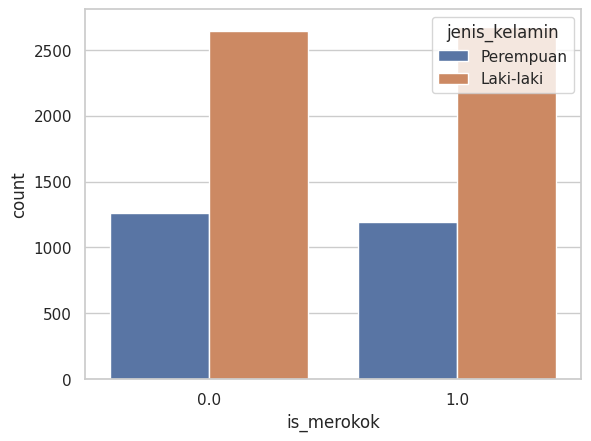

In [ ]:
# Jenis Kelamin
sns.countplot(x='is_merokok',data=df,hue='jenis_kelamin');

# Diisi dengan is merokok = 1 maka laki laki
df['jenis_kelamin'].fillna(value=df['is_merokok'].apply(lambda x: 'Laki-laki' if x == 1 else 'Perempuan'), inplace=True)

In [ ]:
# Pekerjaan
print(df.pekerjaan.value_counts())
df['pekerjaan'].fillna(value='Unknown',inplace=True)

Pegawai swasta    3160
PNS               3108
Freelance         1160
Pengangguran       332
Name: pekerjaan, dtype: int64


In [ ]:
# Provinsi
print(df.provinsi.value_counts())
df['provinsi'].fillna(value='Unknown',inplace=True)

Kupang            261
Tanjungselor      252
Bengkulu          249
Denpasar          246
Banjarmasin       245
Makassar          244
Gorontalo         240
Semarang          238
Jayapura          237
Mamuju            237
Mataram           237
Ambon             234
Manado            233
Kendari           233
Tanjung Pinang    233
Jakarta           232
Serang            231
Pangkalpinang     229
Pontianak         229
Manokwari         228
Pekanbaru         226
Samarinda         225
Jambi             224
Yogyakarta        223
Banda Aceh        223
Banda Lampung     222
Medan             221
Palangkaraya      220
Palu              220
Padang            220
Sofifi            215
Palembang         214
Bandung           212
Surabaya          198
Name: provinsi, dtype: int64


In [ ]:
# Gaji

# gaji rata rata pekerjaan
rata_rata_gaji_pekerjaan = df.groupby('pekerjaan')['gaji'].mean()
print(rata_rata_gaji_pekerjaan)

df['gaji'].fillna(value=df['gaji'].mean(),inplace=True)

pekerjaan
Freelance         8.868289e+06
PNS               8.890537e+06
Pegawai swasta    8.848075e+06
Pengangguran      8.800030e+06
Unknown           8.232729e+06
Name: gaji, dtype: float64


In [ ]:
# is_menikah
df['is_menikah'].fillna(value=df['umur'].apply(lambda x: 1 if x >= 27 else 0), inplace=True)

In [ ]:
# berat & tinggi
df['tinggi'].fillna(df['tinggi'].median(), inplace=True)
df['berat'].fillna(df['berat'].median(), inplace=True)

In [ ]:
# Shampo
print(df.sampo.value_counts())

df['sampo'].fillna(value='Unknown',inplace=True)

Deadbuoy           1618
Moonsilk           1596
Pantone            1571
Shoulder & Head    1567
Merpati            1506
Name: sampo, dtype: int64


In [ ]:
# is_merokok
df['is_merokok'].fillna(value=df['jenis_kelamin'].apply(lambda x: 1 if x == 'Laki-laki' else 0), inplace=True)

In [ ]:
# Pendidikan
print(df.pendidikan.value_counts())
df['pendidikan'].fillna(value='Unknown',inplace=True)

S1     4309
SMA    1986
S2      607
SMP     560
SD      225
S3      160
Name: pendidikan, dtype: int64


In [ ]:
# Stress
df['stress'].fillna(value=df['stress'].median(),inplace=True)

In [ ]:
df.isna().sum()

umur              0
jenis_kelamin     0
pekerjaan         0
provinsi          0
gaji              0
is_menikah        0
is_keturunan     89
berat             0
tinggi            0
sampo             0
is_merokok        0
pendidikan        0
stress            0
botak_prob       79
dtype: int64

In [ ]:
# Drop kolom
df.dropna(subset=['is_keturunan','botak_prob'], inplace=True)

In [ ]:
# Mendeteksi Outliers
from scipy import stats
print(f'Jumlah baris sebelum memfilter outlier: {len(df)}')
num_col = ['umur','gaji','berat','tinggi','stress']
filtered_entries = np.array([True] * len(df))
for col in num_col:
    zscore = abs(stats.zscore(df[col]))
    filtered_entries = (zscore < 3) & filtered_entries

df = df[filtered_entries]

print(f'Jumlah baris setelah menghilangkan outlier: {len(df)}')

Jumlah baris sebelum memfilter outlier: 7750
Jumlah baris setelah menghilangkan outlier: 7461


# **Visualisasi Data**

In [ ]:
from matplotlib.lines import Line2D
sns.set_style('darkgrid')

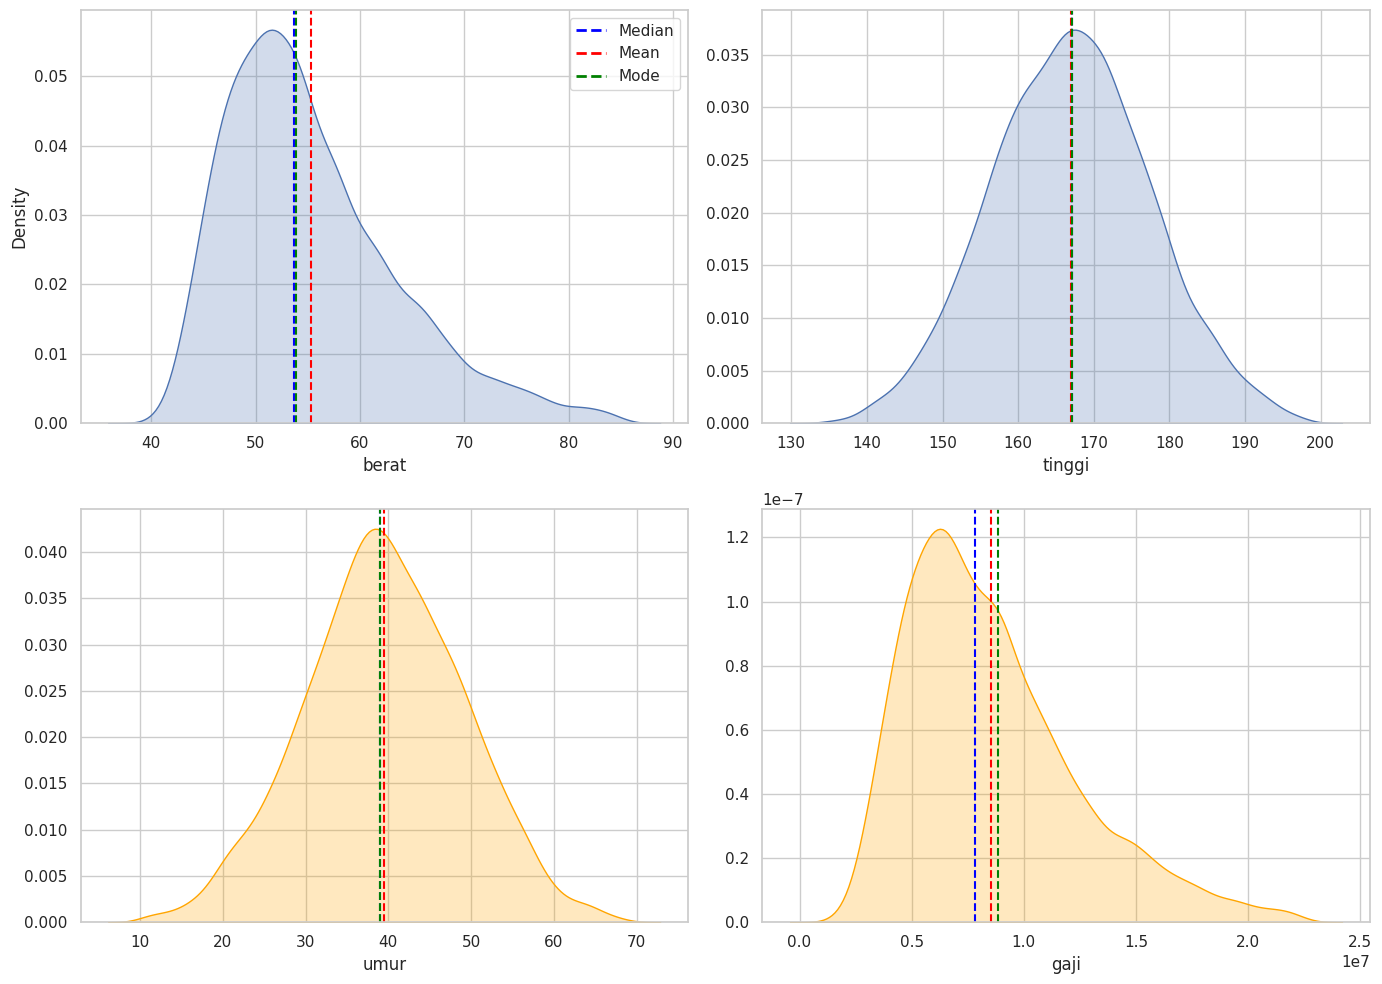

In [ ]:
# Distribusi
sns.set(style="whitegrid")
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Plot Berat
sns.kdeplot(data=df, x="berat", ax=axs[0, 0], fill=True)
axs[0, 0].axvline(x=df.berat.median(), color='blue', ls='--', lw=1.5)
axs[0, 0].axvline(x=df.berat.mean(), color='red', ls='--', lw=1.5)
axs[0, 0].axvline(x=df.berat.mode()[0], color='green', ls='--', lw=1.5)

colors = ['blue', 'red', 'green']
lines = [Line2D([0], [0], color=c, linewidth=2, linestyle='--') for c in colors]
labels = ['Median', 'Mean', 'Mode']
axs[0, 0].legend(lines, labels)

# Plot Tinggi
sns.kdeplot(data=df, x="tinggi", ax=axs[0, 1], fill=True)
axs[0, 1].axvline(x=df.tinggi.median(), color='blue', ls='--', lw=1.5)
axs[0, 1].axvline(x=df.tinggi.mean(), color='red', ls='--', lw=1.5)
axs[0, 1].axvline(x=df.tinggi.mode()[0], color='green', ls='--', lw=1.5)
axs[0, 1].set_ylabel('')

# Plot Umur
sns.kdeplot(data=df, x="umur", ax=axs[1, 0], fill=True, color='orange')
axs[1, 0].axvline(x=df.umur.median(), color='blue', ls='--', lw=1.5)
axs[1, 0].axvline(x=df.umur.mean(), color='red', ls='--', lw=1.5)
axs[1, 0].axvline(x=df.umur.mode()[0], color='green', ls='--', lw=1.5)
axs[1, 0].set_ylabel('')

# Plot Gaji
sns.kdeplot(data=df, x="gaji", ax=axs[1, 1], fill=True, color='orange')
axs[1, 1].axvline(x=df.gaji.median(), color='blue', ls='--', lw=1.5)
axs[1, 1].axvline(x=df.gaji.mean(), color='red', ls='--', lw=1.5)
axs[1, 1].axvline(x=df.gaji.mode()[0], color='green', ls='--', lw=1.5)
axs[1, 1].set_ylabel('')

plt.tight_layout()
plt.show()

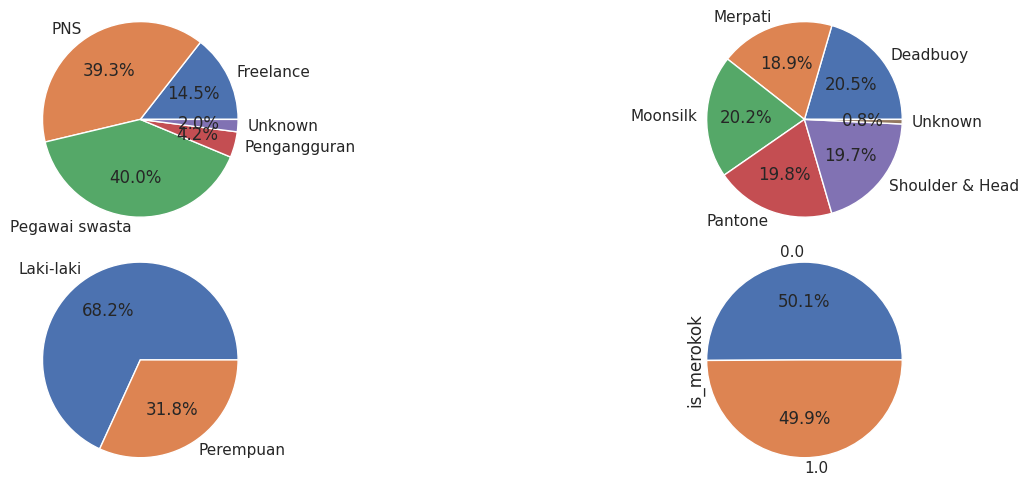

In [ ]:
# Ratio Pie Chart (pekerjaan, sampo, jenis kelamin, is_merokok)
fig2, axs2 = plt.subplots(2,2, figsize=(15,5))

df.groupby('pekerjaan').size().plot(kind='pie', ax=axs2[0,0], autopct = '%.1f%%', radius=1.3)
df.groupby('sampo').size().plot(kind='pie', ax=axs2[0,1], autopct = '%.1f%%', radius=1.3)
df.groupby('jenis_kelamin').size().plot(kind='pie', ax=axs2[1,0], autopct = '%.1f%%', radius=1.3)
df.groupby('is_merokok').size().plot(kind='pie', ax=axs2[1,1], autopct = '%.1f%%', radius=1.3)
axs2[0,0].set_ylabel('')
axs2[0,1].set_ylabel('')
axs2[1,0].set_ylabel('')
axs2[1,1].set_ylabel('is_merokok')
plt.tight_layout()
plt.show()

Analisis orang prob botak tinggi

In [ ]:
prob_botak_tinggi = df[ df['botak_prob'] >= 0.8]

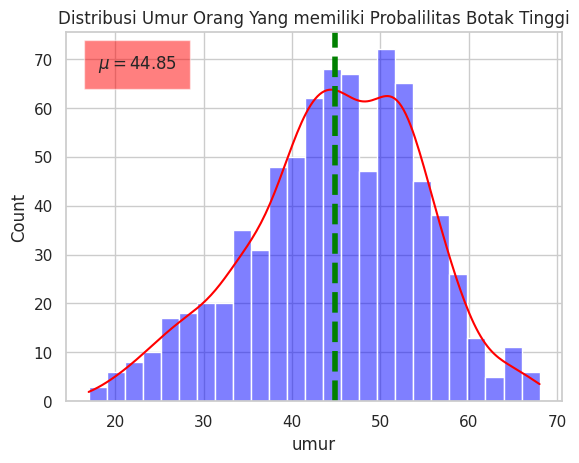

In [ ]:
# Umur
fig3, axs3 = plt.subplots()
sns.histplot(prob_botak_tinggi, x='umur', bins=25, color='blue', alpha=0.5, kde=True, ax=axs3)
axs3.lines[0].set_color('red')
axs3.axvline(x=prob_botak_tinggi.umur.mean(), color='green', ls='--', lw=4)
axs3.text(18, 68, r'$\mu={}$'.format('%.2f' % prob_botak_tinggi['umur'].mean()), style='italic', bbox={
        'facecolor': 'red', 'alpha': 0.5, 'pad': 10})
axs3.set_title('Distribusi Umur Orang Yang memiliki Probalilitas Botak Tinggi')
plt.show()

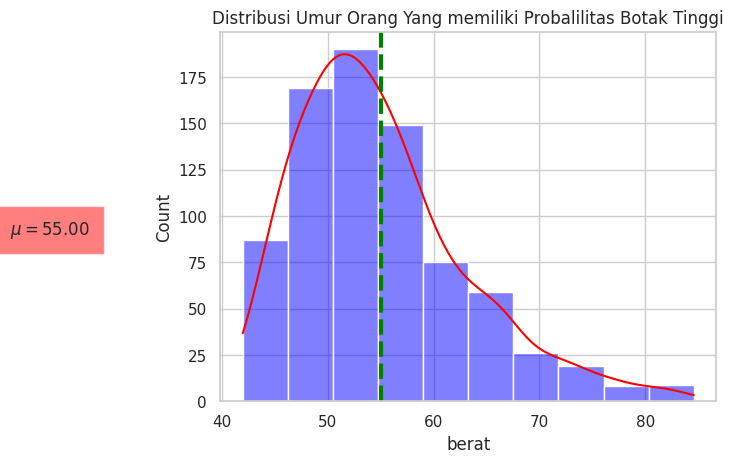

In [ ]:
# Berat
fig3, axs3 = plt.subplots()
sns.histplot(prob_botak_tinggi, x='berat', bins=10, color='blue', alpha=0.5, kde=True, ax=axs3)
axs3.lines[0].set_color('red')
axs3.axvline(x=prob_botak_tinggi.berat.mean(), color='green', ls='--', lw=3)
axs3.text(20, 90, r'$\mu={}$'.format('%.2f' % prob_botak_tinggi['berat'].mean()), style='italic', bbox={
        'facecolor': 'red', 'alpha': 0.5, 'pad': 10})
axs3.set_title('Distribusi Umur Orang Yang memiliki Probalilitas Botak Tinggi')
plt.show()

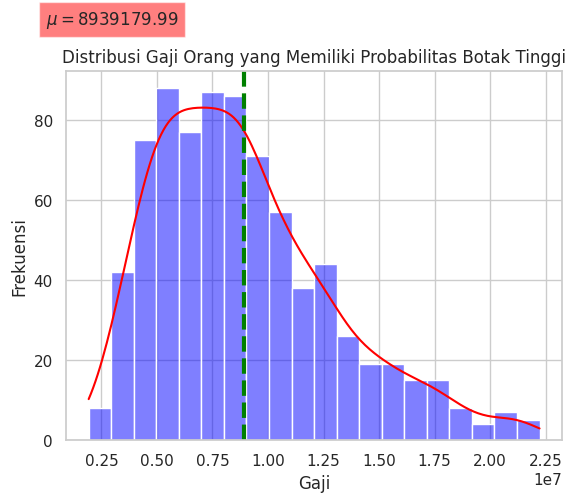

In [ ]:
# Gaji
fig3, axs3 = plt.subplots()
sns.histplot(prob_botak_tinggi, x='gaji', binwidth=1000000, color='blue', alpha=0.5, kde=True, ax=axs3)
axs3.lines[0].set_color('red')
axs3.axvline(x=prob_botak_tinggi.gaji.mean(), color='green', ls='--', lw=3)
axs3.text(10, 104, r'$\mu={}$'.format('%.2f' % prob_botak_tinggi['gaji'].mean()), style='italic', bbox={
        'facecolor': 'red', 'alpha': 0.5, 'pad': 5})
axs3.set_xlabel('Gaji')
axs3.set_ylabel('Frekuensi')
axs3.set_title('Distribusi Gaji Orang yang Memiliki Probabilitas Botak Tinggi')

plt.show()

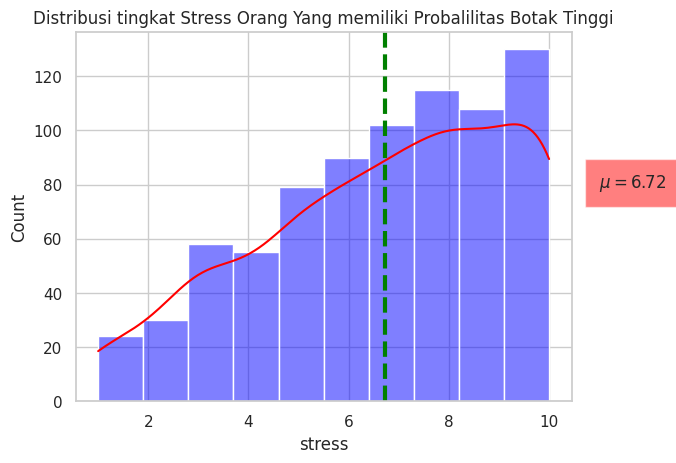

In [ ]:
# Stress
fig3, axs3 = plt.subplots()
sns.histplot(prob_botak_tinggi, x='stress', bins=10, color='blue', alpha=0.5, kde=True, ax=axs3)
axs3.lines[0].set_color('red')
axs3.axvline(x=prob_botak_tinggi.stress.mean(), color='green', ls='--', lw=3)
axs3.text(11, 79, r'$\mu={}$'.format('%.2f' % prob_botak_tinggi['stress'].mean()), style='italic', bbox={
        'facecolor': 'red', 'alpha': 0.5, 'pad': 10})
axs3.set_title('Distribusi tingkat Stress Orang Yang memiliki Probalilitas Botak Tinggi')
plt.show()

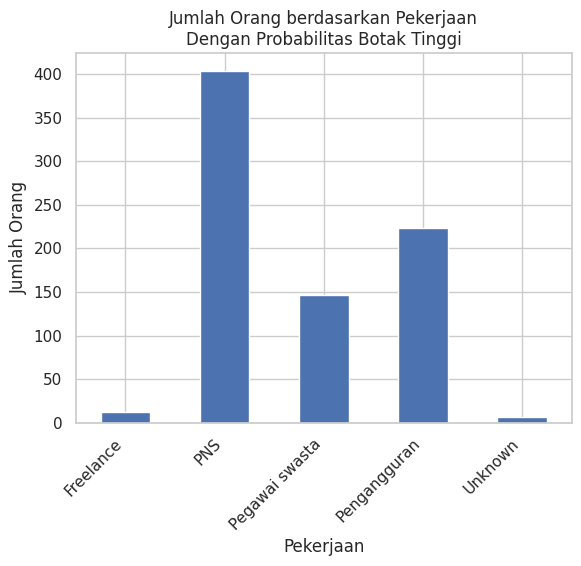

In [ ]:
# Pekerjaan
prob_botak_tinggi.groupby('pekerjaan').size().plot(kind='bar')
plt.title('Jumlah Orang berdasarkan Pekerjaan\nDengan Probabilitas Botak Tinggi')
plt.xlabel('Pekerjaan')
plt.ylabel('Jumlah Orang')
plt.xticks(rotation=45, ha='right')  # Putar label sumbu x agar mudah dibaca
plt.show()

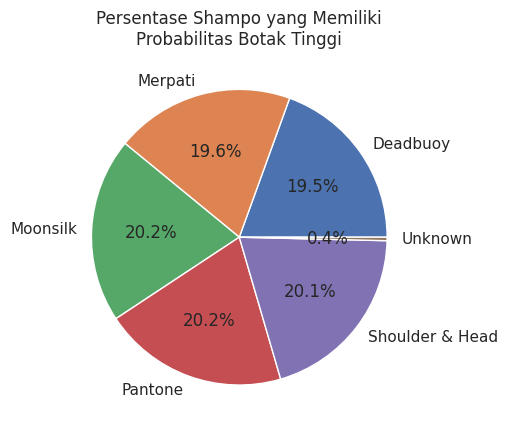

In [ ]:
# Shampo
prob_botak_tinggi.groupby('sampo').size().plot(kind='pie', autopct='%.1f%%')
plt.title('Persentase Shampo yang Memiliki\nProbabilitas Botak Tinggi')
plt.ylabel('')
plt.show()

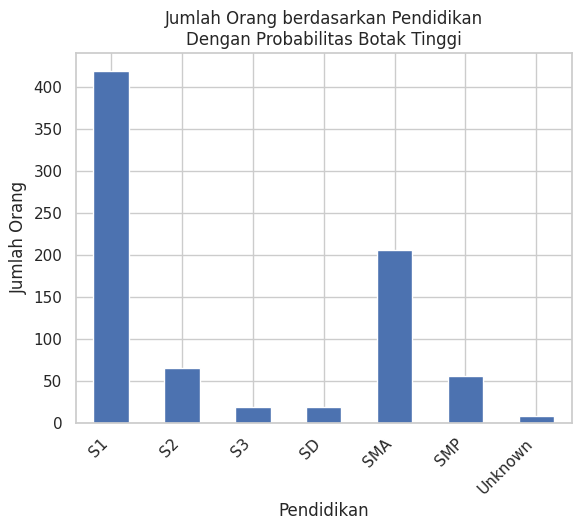

In [ ]:
# Pendidikan
prob_botak_tinggi.groupby('pendidikan').size().plot(kind='bar')
plt.title('Jumlah Orang berdasarkan Pendidikan\nDengan Probabilitas Botak Tinggi')
plt.xlabel('Pendidikan')
plt.ylabel('Jumlah Orang')
plt.xticks(rotation=45, ha='right')  # Putar label sumbu x agar mudah dibaca
plt.show()

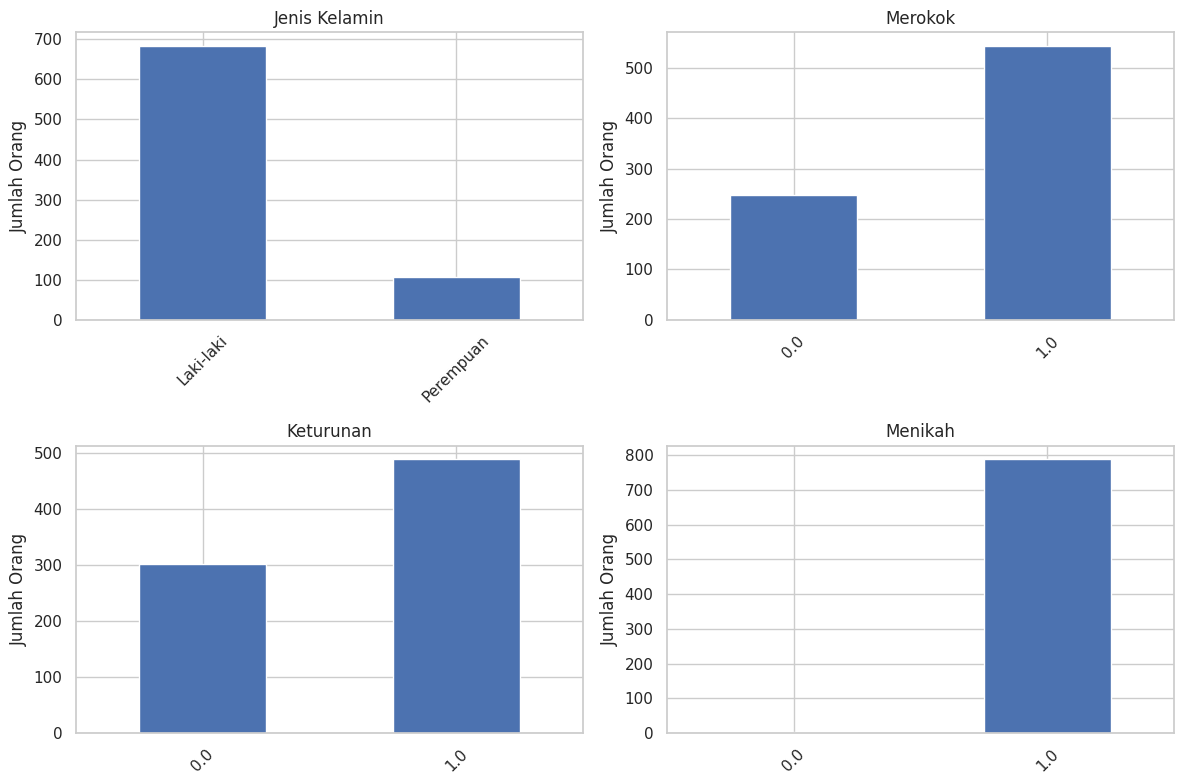

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Plot untuk jenis kelamin
prob_botak_tinggi.groupby('jenis_kelamin').size().plot(kind='bar', ax=axs[0, 0])
axs[0, 0].set_title('Jenis Kelamin')
axs[0, 0].set_xlabel('')
axs[0, 0].set_ylabel('Jumlah Orang')
axs[0, 0].tick_params(axis='x', rotation=45)

# Plot untuk merokok
prob_botak_tinggi.groupby('is_merokok').size().plot(kind='bar', ax=axs[0, 1])
axs[0, 1].set_title('Merokok')
axs[0, 1].set_xlabel('')
axs[0, 1].set_ylabel('Jumlah Orang')
axs[0, 1].tick_params(axis='x', rotation=45)

# Plot untuk keturunan
prob_botak_tinggi.groupby('is_keturunan').size().plot(kind='bar', ax=axs[1, 0])
axs[1, 0].set_title('Keturunan')
axs[1, 0].set_xlabel('')
axs[1, 0].set_ylabel('Jumlah Orang')
axs[1, 0].tick_params(axis='x', rotation=45)

# Plot untuk menikah
prob_botak_tinggi.groupby('is_menikah').size().plot(kind='bar', ax=axs[1, 1])
axs[1, 1].set_title('Menikah')
axs[1, 1].set_xlabel('')
axs[1, 1].set_ylabel('Jumlah Orang')
axs[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# **Preprocessing**

In [ ]:
# Membagi data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from imblearn.pipeline import Pipeline
X = df.drop(['botak_prob'],axis=1)
y = df['botak_prob']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Membagi jenis kolom
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X_train.select_dtypes(include=['object', 'bool']).columns

In [ ]:
# Numerical
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

# Categorical
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder())])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)])

# **Modelling**

In [ ]:
from sklearn.linear_model import LinearRegression
from imblearn.over_sampling import SMOTE
from sklearn.metrics import mean_absolute_error,mean_squared_error
model = Pipeline([
    ('preprocessor', preprocessor),
    ('regression', LinearRegression())])

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# **Hasil**

Hasil Evaluasi Linear Regression
MSE: 0.0052908402981555625
MAE: 0.05314415227535915
RMSE:  0.07273816259815451


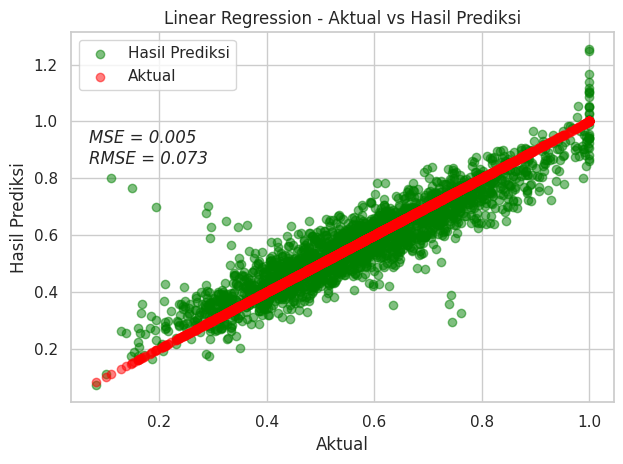

In [ ]:
#Evaluasi dengan MSE, MAE dan RMSE, Semakin kecil semakin bagus

# MSE
print(f"Hasil Evaluasi Linear Regression")
MSE = mean_squared_error(y_test,y_pred)
print('MSE:', MSE)

# MAE
MAE = mean_absolute_error(y_test,y_pred)
print('MAE:', MAE)

#RMSE
RMSE = np.sqrt(MSE)
print('RMSE: ',RMSE)

# Scatter plot nilai prediksi dengan warna biru
plt.scatter(y_test, y_pred, color='green', alpha=0.5, label='Hasil Prediksi')

# Scatter plot nilai aktual dengan warna merah
plt.scatter(y_test, y_test, color='red', alpha=0.5, label='Aktual')

plt.title('Linear Regression - Aktual vs Hasil Prediksi')
plt.xlabel('Aktual')
plt.ylabel('Hasil Prediksi')
plt.text(0.07, 0.85, f"MSE = {'%.3f' % mse}\nRMSE = {'%.3f' % rmse}", style='italic')

# Tambahkan legenda
plt.legend()

plt.tight_layout()
plt.show()

# **Cross Validation**

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
# Menentukan metrik evaluasi yang ingin dihitung
scoring = {'mse': 'neg_mean_squared_error', 'mae': 'neg_mean_absolute_error'}

# Melakukan validasi silang dan menghitung skor MSE dan MAE
cv_results = cross_validate(model, X_train, y_train, cv=5, scoring=scoring)

# Mengambil skor MSE dan MAE dari hasil validasi silang
mse_scores = -cv_results['test_mse']
mae_scores = -cv_results['test_mae']

# Menghitung skor RMSE dari MSE
rmse_scores = np.sqrt(mse_scores)

# Cetak hasil validasi silang
print("Rata-rata Cross-Validation MSE:", np.mean(mse_scores))
print("Rata-rata Cross-Validation MAE:", np.mean(mae_scores))
print("Rata-rata Cross-Validation RMSE:", np.mean(rmse_scores))

Rata-rata Cross-Validation MSE: 0.005186870404222338
Rata-rata Cross-Validation MAE: 0.052771259400246816
Rata-rata Cross-Validation RMSE: 0.07192452603628462


Reference :
www.kaggle.com